In [1]:
!pip install rdkit

In [2]:
import pandas as pd
from rdkit import Chem
from tqdm.auto import tqdm
from rdkit.Chem.Draw import MolsToGridImage
import seaborn as sns
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
import matplotlib.pyplot as plt

In [4]:
# Reading Training Set
dfTrain = pd.read_csv("training_data.csv")
dfTest = pd.read_csv("test_data.csv")
#dfTrain.head()
#dfTest.head()

In [5]:
# Calculating Descriptors
smiles_stringsTrain = dfTrain['SMILES'].tolist()
smiles_stringsTest = dfTest['SMILES'].tolist()
smiles_listTrain = []
smiles_listTest = []
for i in range(0, len(smiles_stringsTrain)):
  smiles_listTrain.append(Chem.MolFromSmiles(smiles_stringsTrain[i]))
for i in range(0, len(smiles_stringsTest)):
  smiles_listTest.append(Chem.MolFromSmiles(smiles_stringsTest[i]))
chosen_descriptors = ['MolWt', 'MolLogP', 'NumRotatableBonds', 'NumHAcceptors', 'NumHDonors']
mol_descriptor_calculator = MolecularDescriptorCalculator(chosen_descriptors)
descrsTrain = [mol_descriptor_calculator.CalcDescriptors(mol) for mol in smiles_listTrain]
descrsTest = [mol_descriptor_calculator.CalcDescriptors(mol) for mol in smiles_listTest]
df2Train = pd.DataFrame(descrsTrain)
df2Test = pd.DataFrame(descrsTest)

In [30]:
# Appending Descriptors to Existing Dataframes
for i in range(0, len(chosen_descriptors)):
    curName = chosen_descriptors[i]
    dfTrain[curName] = df2Train[i].tolist() 
    dfTest[curName] = df2Test[i].tolist()
#dfTrain.head()

# Filtering Data Based on Lipinski Rules
def lipinski(df):
    return df[(df.NumHDonors <= 5) & (df.NumHAcceptors <= 10) & (df.MolWt <= 500) & (df.MolLogP <= 5)]
df3Train = lipinski(dfTrain)
df3Test = lipinski(dfTest)

# Assigns True or False Depending on Whether a Compound Follows Lipinski Rules
def lipinskiAssign(df):
    conditions = [(df.NumHDonors <= 5) & (df.NumHAcceptors <= 10) & (df.MolWt <= 500) & (df.MolLogP <= 5)]
    result = pd.Series([all(cond) for cond in zip(*conditions)]).astype(bool)
    return df.assign(Lipinski=result)
dfTrain = lipinskiAssign(dfTrain)
dfTest = lipinskiAssign(dfTest)
dfTrain.head()

,ChEMBL_ID,SMILES,pIC50,MolWt,MolLogP,NumRotatableBonds,NumHAcceptors,NumHDonors,Lipinski
0,CHEMBL558598,Cc1c(C(=O)NN2CCCCC2)nn(-c2ccc(Cl)cc2Cl)c1-c1cc...,4.60,500.257,6.36042,4,4,1,False
1,CHEMBL154211,N#CC(C#N)=C1NCCN1CCNCc1ccc(CN2CCCCC2)o1,7.52,354.458,1.51906,7,7,2,True
2,CHEMBL85473,COc1cc2cc(C(O)C3CC[N+](C)(Cc4ccccc4)CC3)sc2cc1...,4.71,492.479,2.01270,6,4,1,True
3,CHEMBL3402707,CN(CCCCCN1C(=O)c2ccccc2C1=O)Cc1ccccc1.Cl,6.44,372.896,4.00670,8,3,0,True
4,CHEMBL3402712,CN(CCCCCN1C(=O)c2ccccc2C1=O)Cc1ccccc1F.Cl,6.28,390.886,4.14580,8,3,0,True


In [29]:
# Analyzing Statistics of Dataframes
print("Training Set Statistics:")
print(dfTrain.describe())
print("")
print("Test Set Statistics:")
print(dfTest.describe())

Training Set Statistics:
             pIC50        MolWt      MolLogP  NumRotatableBonds  \
count  4724.000000  4724.000000  4724.000000        4724.000000   
mean      6.150318   436.439611     4.343615           6.882303   
std       1.306678   122.338565     2.301972           4.696113   
min       4.000000   144.238000    -6.143900           0.000000   
25%       5.130000   352.428000     3.078515           4.000000   
50%       5.960000   419.131000     4.297260           6.000000   
75%       7.010000   508.670750     5.603725           9.000000   
max      10.960000  1235.463000    13.506800          33.000000   

       NumHAcceptors   NumHDonors  
count    4724.000000  4724.000000  
mean        4.611135     1.184378  
std         1.981636     1.134265  
min         0.000000     0.000000  
25%         3.000000     0.000000  
50%         4.000000     1.000000  
75%         6.000000     2.000000  
max        22.000000    13.000000  

Test Set Statistics:
           pIC50       Mo

# Individual Distribution Plots

### Distribution of pIC50 Values - Test Set

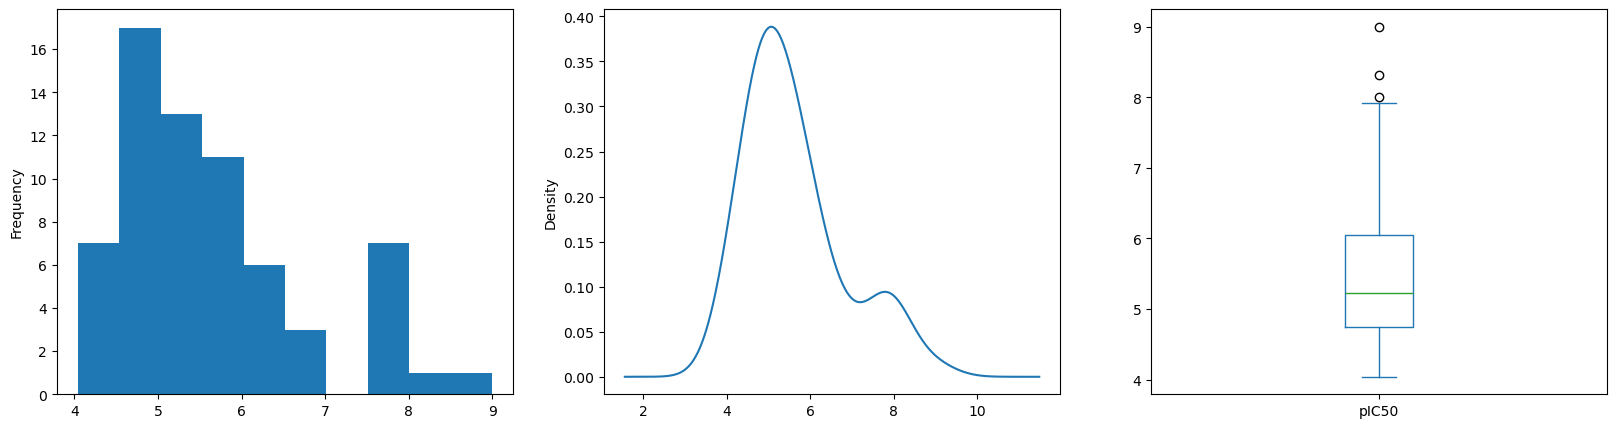

In [20]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
dfTest['pIC50'].plot(kind="hist",ax=ax[0])
dfTest['pIC50'].plot(kind="kde",ax=ax[1])
dfTest['pIC50'].plot(kind="box",ax=ax[2])
plt.show()

### Distribution of pIC50 Values - Train Set

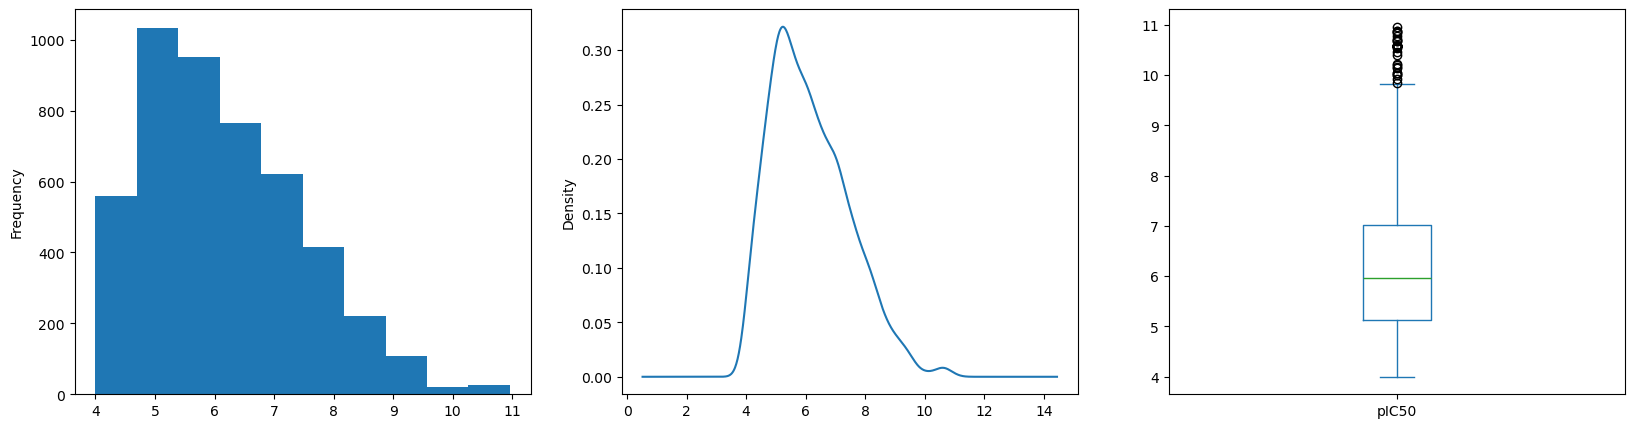

In [21]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
dfTrain['pIC50'].plot(kind="hist",ax=ax[0])
dfTrain['pIC50'].plot(kind="kde",ax=ax[1])
dfTrain['pIC50'].plot(kind="box",ax=ax[2])
plt.show()

### Distribution of Molecular Weight - Test Set

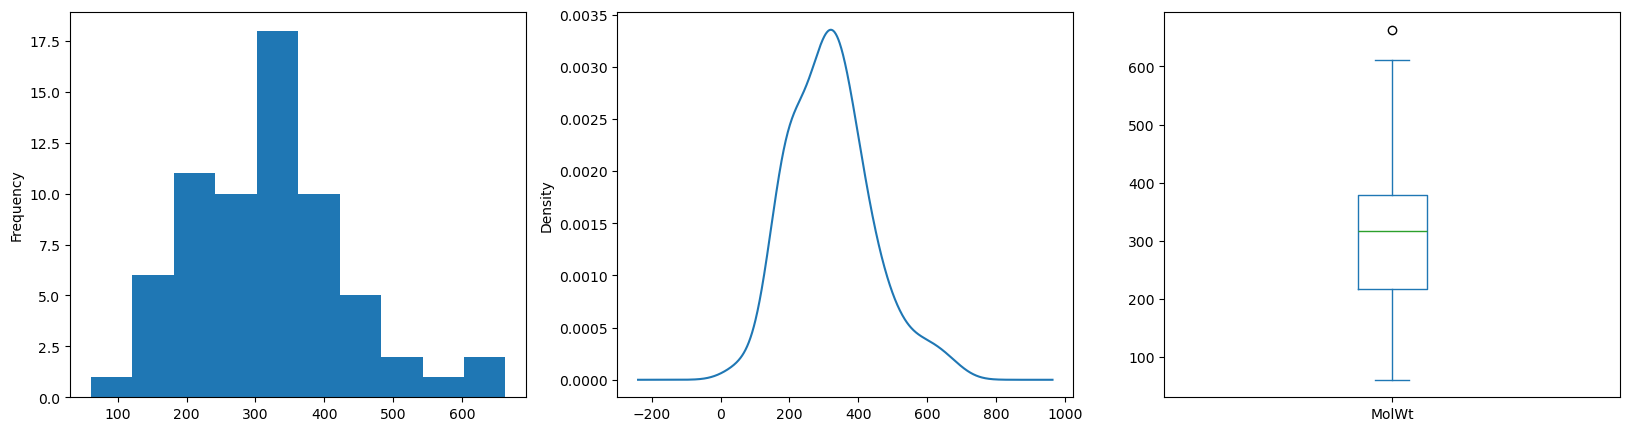

In [22]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
dfTest['MolWt'].plot(kind="hist",ax=ax[0])
dfTest['MolWt'].plot(kind="kde",ax=ax[1])
dfTest['MolWt'].plot(kind="box",ax=ax[2])
plt.show()

### Distribution of Molecular Weight - Train Set

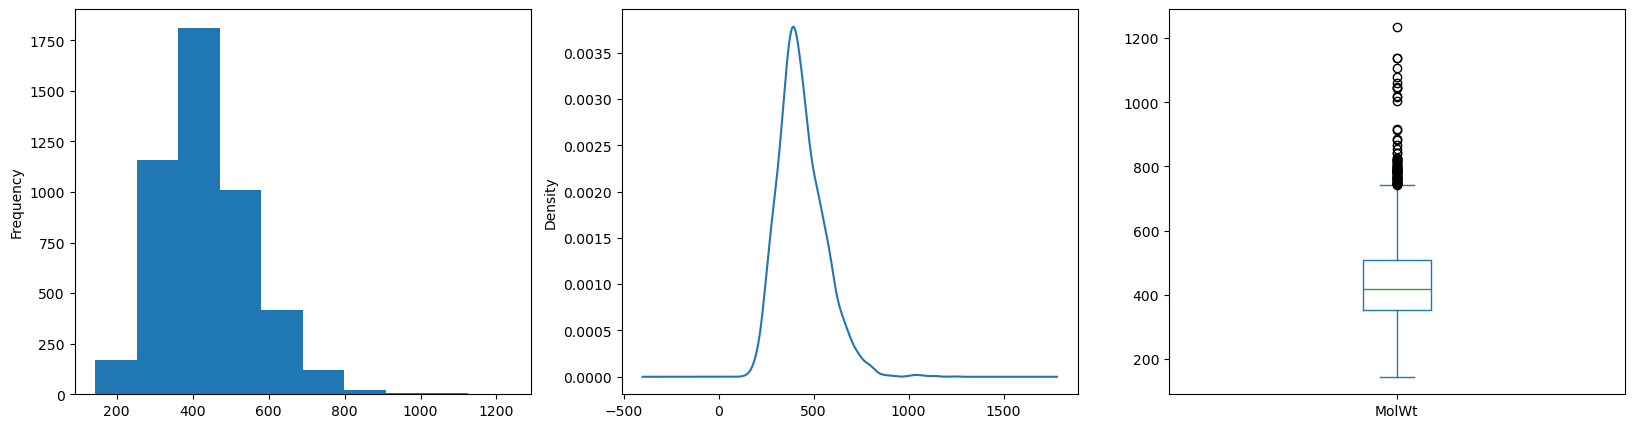

In [23]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
dfTrain['MolWt'].plot(kind="hist",ax=ax[0])
dfTrain['MolWt'].plot(kind="kde",ax=ax[1])
dfTrain['MolWt'].plot(kind="box",ax=ax[2])
plt.show()

### Distribution of LogP - Test Set

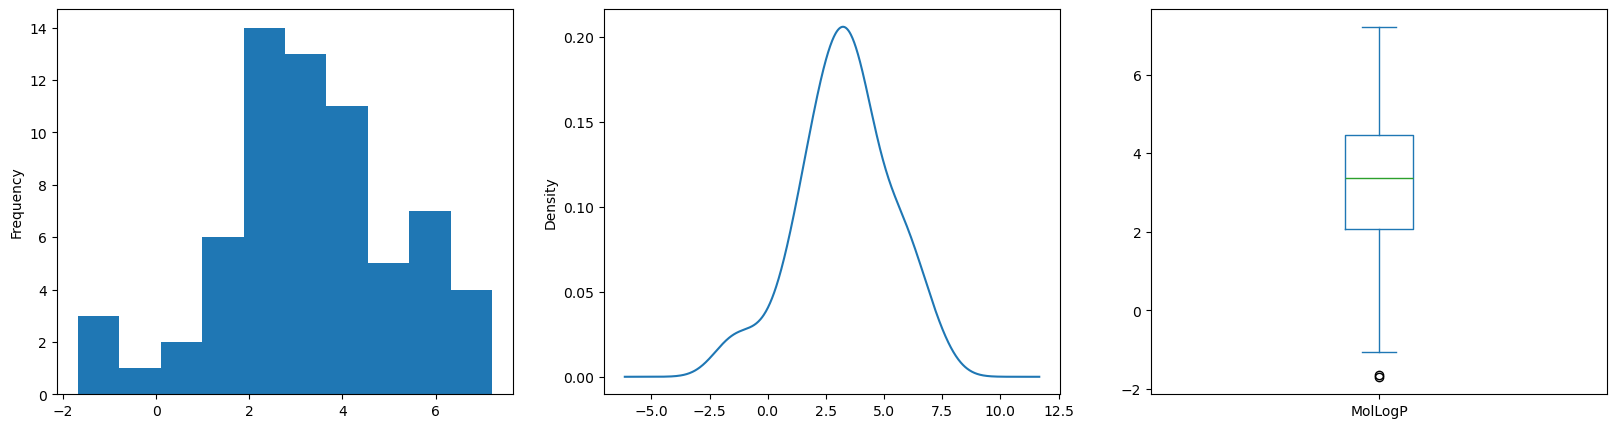

In [24]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
dfTest['MolLogP'].plot(kind="hist",ax=ax[0])
dfTest['MolLogP'].plot(kind="kde",ax=ax[1])
dfTest['MolLogP'].plot(kind="box",ax=ax[2])
plt.show()

### Distribution of LogP - Train Set

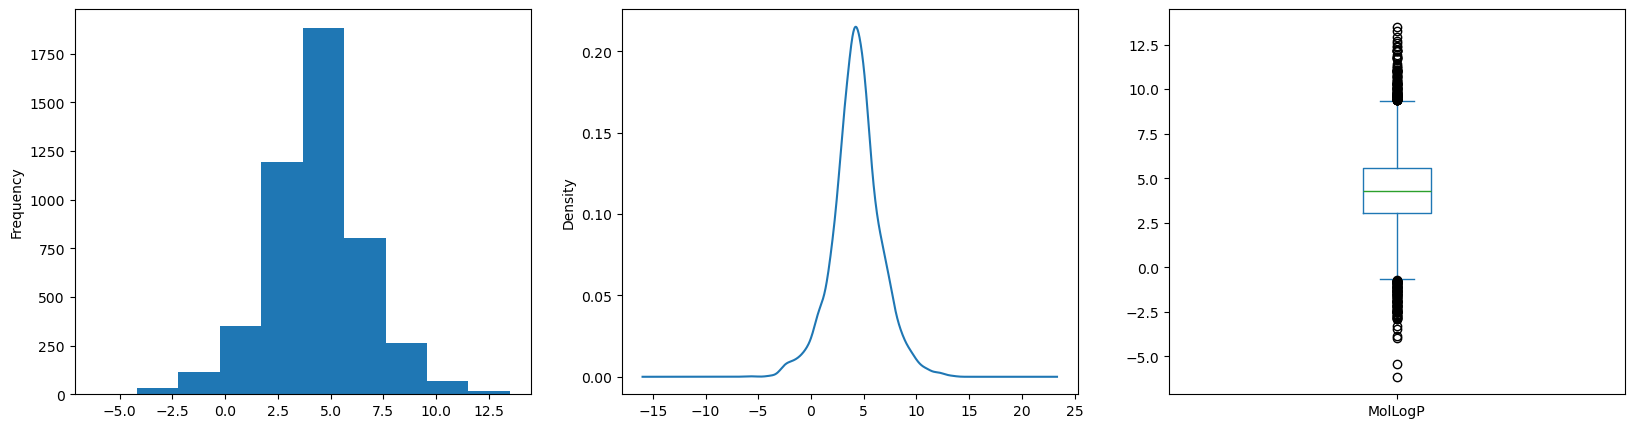

In [25]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
dfTrain['MolLogP'].plot(kind="hist",ax=ax[0])
dfTrain['MolLogP'].plot(kind="kde",ax=ax[1])
dfTrain['MolLogP'].plot(kind="box",ax=ax[2])
plt.show()

### Distribution of Number of Rotatable Bonds - Test Set

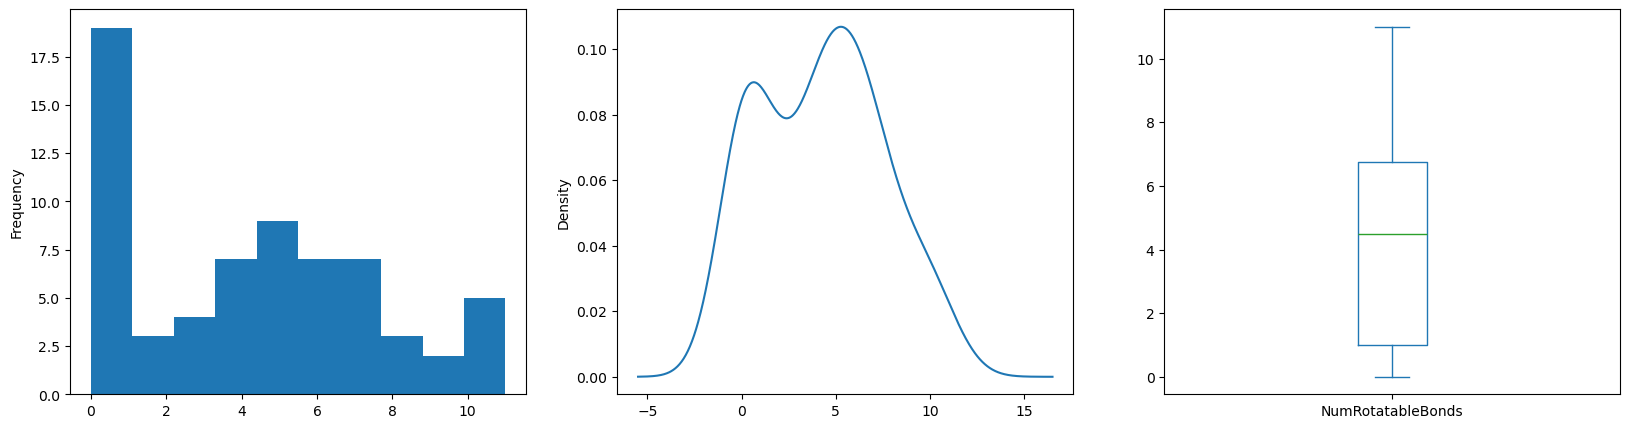

In [26]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
dfTest['NumRotatableBonds'].plot(kind="hist",ax=ax[0])
dfTest['NumRotatableBonds'].plot(kind="kde",ax=ax[1])
dfTest['NumRotatableBonds'].plot(kind="box",ax=ax[2])
plt.show()

### Distribution of Number of Rotatable Bonds - Train Set

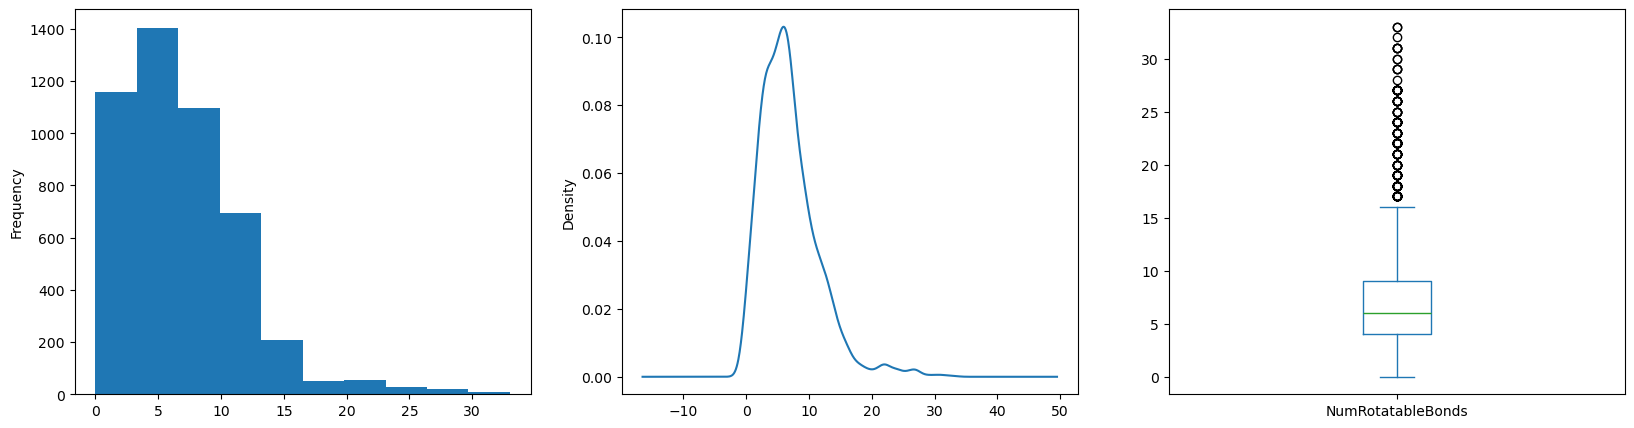

In [27]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
dfTrain['NumRotatableBonds'].plot(kind="hist",ax=ax[0])
dfTrain['NumRotatableBonds'].plot(kind="kde",ax=ax[1])
dfTrain['NumRotatableBonds'].plot(kind="box",ax=ax[2])
plt.show()

### Distribution of Number of H Acceptors - Test Set

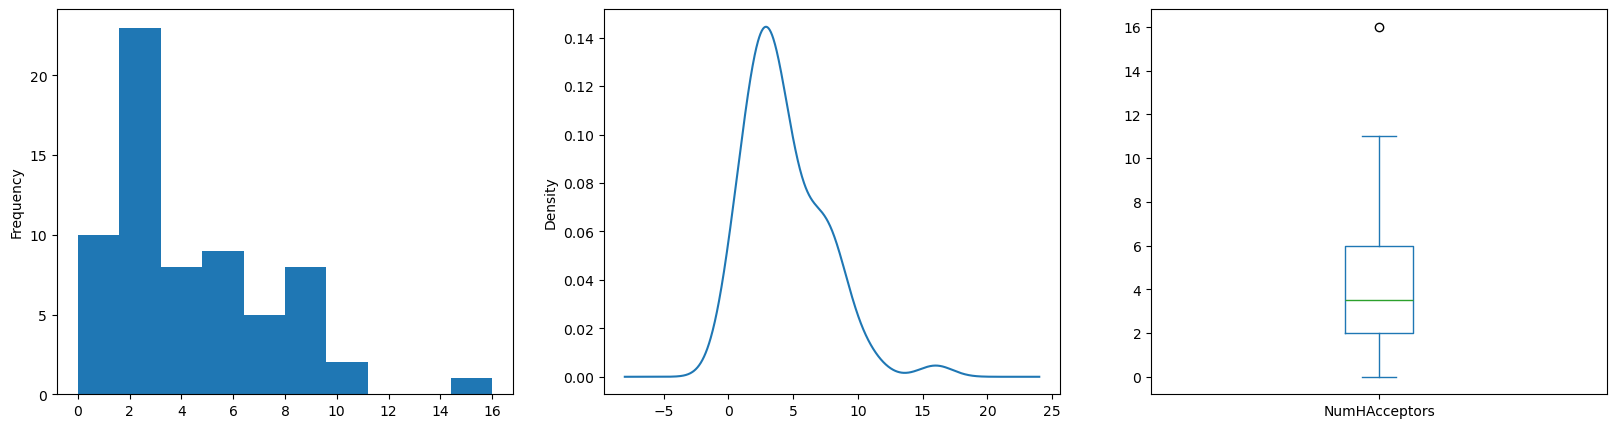

In [28]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
dfTest['NumHAcceptors'].plot(kind="hist",ax=ax[0])
dfTest['NumHAcceptors'].plot(kind="kde",ax=ax[1])
dfTest['NumHAcceptors'].plot(kind="box",ax=ax[2])
plt.show()

### Distribution of Number of H Acceptors - Train Set

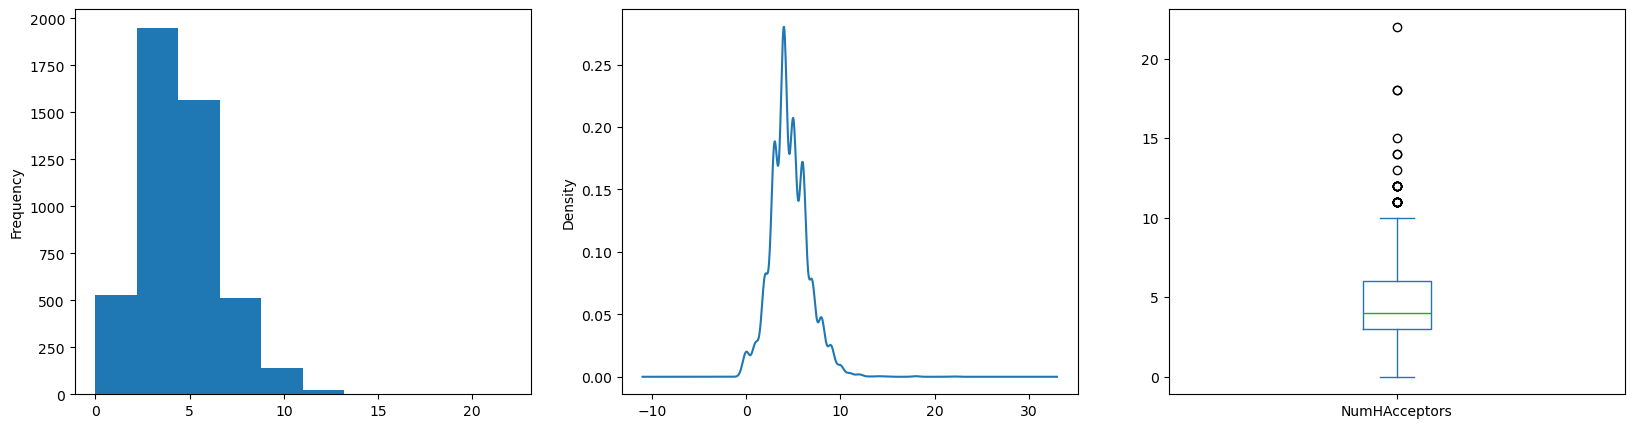

In [29]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
dfTrain['NumHAcceptors'].plot(kind="hist",ax=ax[0])
dfTrain['NumHAcceptors'].plot(kind="kde",ax=ax[1])
dfTrain['NumHAcceptors'].plot(kind="box",ax=ax[2])
plt.show()

### Distribution of Number of H Donors - Test Set

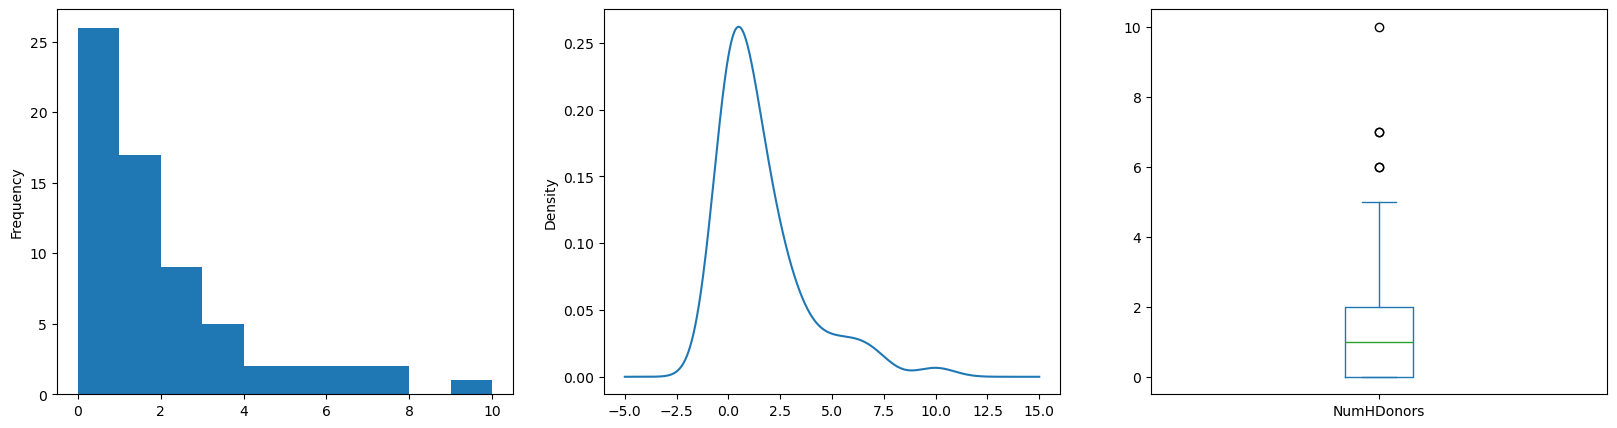

In [30]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
dfTest['NumHDonors'].plot(kind="hist",ax=ax[0])
dfTest['NumHDonors'].plot(kind="kde",ax=ax[1])
dfTest['NumHDonors'].plot(kind="box",ax=ax[2])
plt.show()

### Distribution of Number of H Donors - Train Set

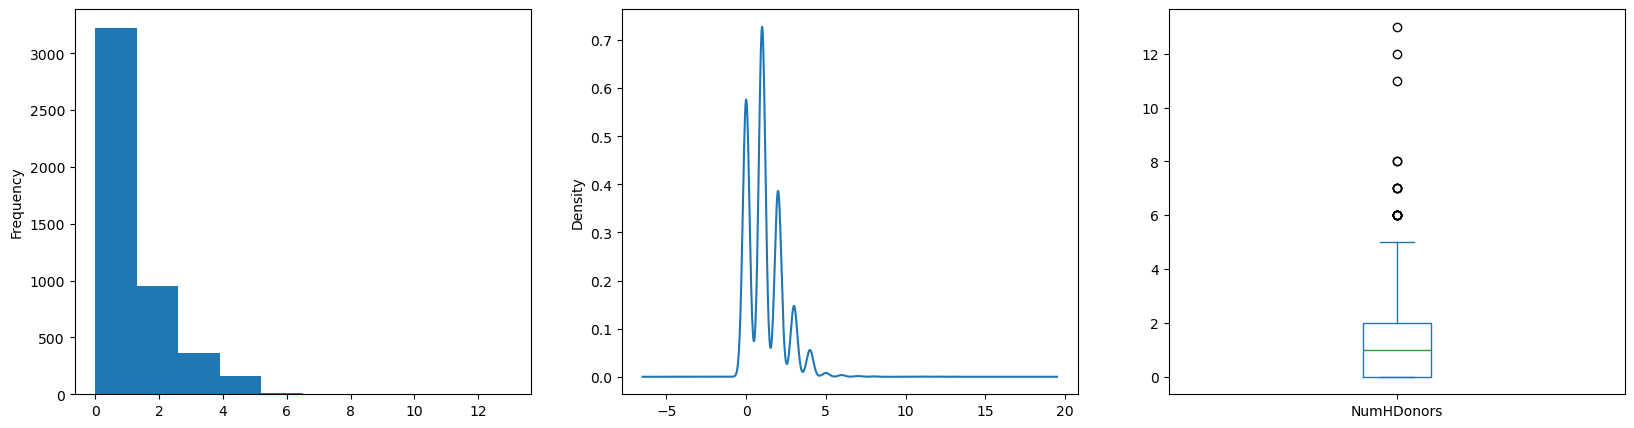

In [31]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
dfTrain['NumHDonors'].plot(kind="hist",ax=ax[0])
dfTrain['NumHDonors'].plot(kind="kde",ax=ax[1])
dfTrain['NumHDonors'].plot(kind="box",ax=ax[2])
plt.show()

# Comparison of Distribution Plots

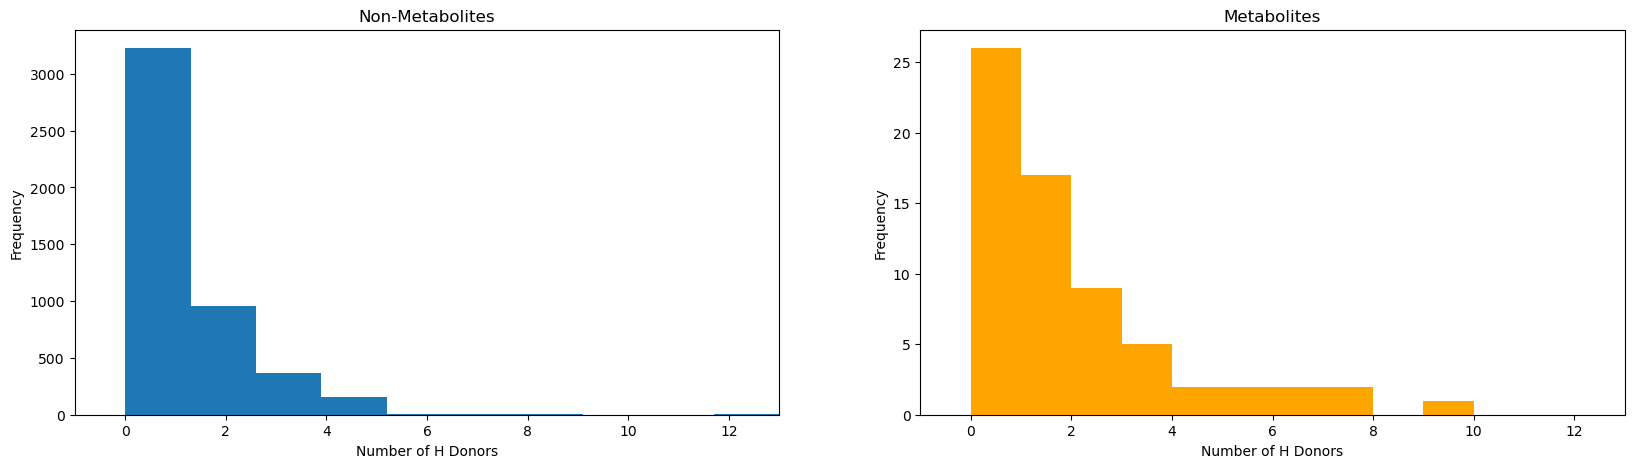

In [42]:
# Number of H Donors
fig,ax = plt.subplots(1,2,figsize=(20,5))
dfTrain['NumHDonors'].plot(kind="hist",ax=ax[0], title = "Non-Metabolites", xlabel = "Number of H Donors", xlim = (-1, 13))
dfTest['NumHDonors'].plot(kind="hist",ax=ax[1], title = "Metabolites", xlabel = "Number of H Donors", color = 'orange', xlim = (-1, 13))
plt.show()

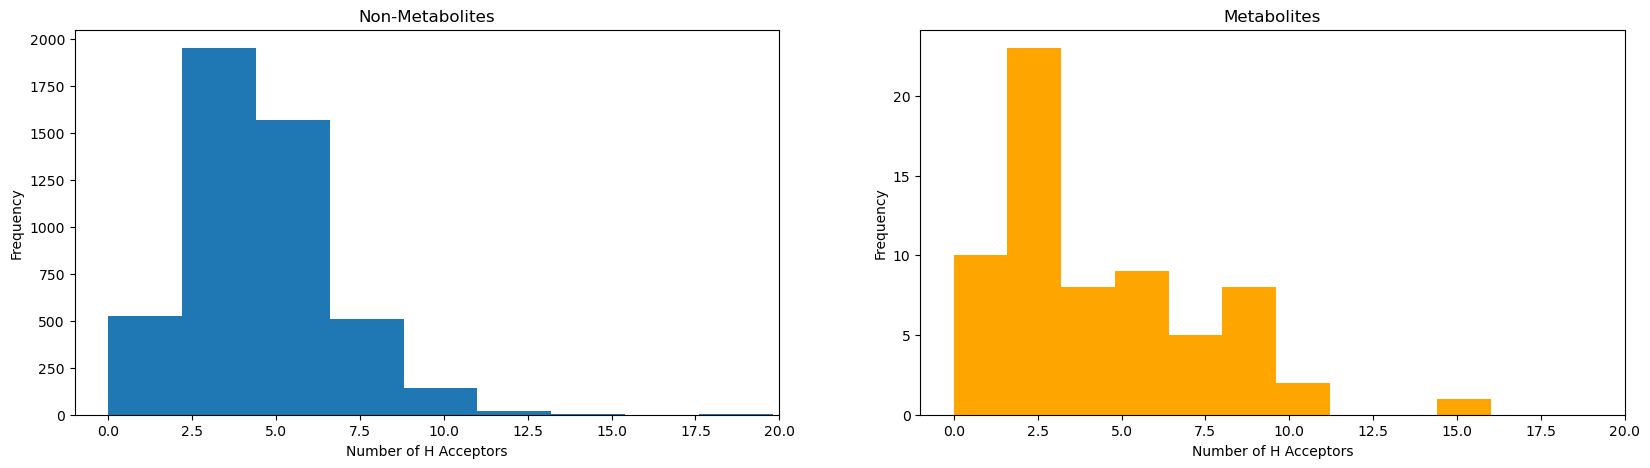

In [41]:
# Number of H Acceptors
fig,ax = plt.subplots(1,2,figsize=(20,5))
dfTrain['NumHAcceptors'].plot(kind="hist",ax=ax[0], title = "Non-Metabolites", xlabel = "Number of H Acceptors", xlim = (-1, 20))
dfTest['NumHAcceptors'].plot(kind="hist",ax=ax[1], title = "Metabolites", xlabel = "Number of H Acceptors", color = 'orange', xlim = (-1, 20))
plt.show()

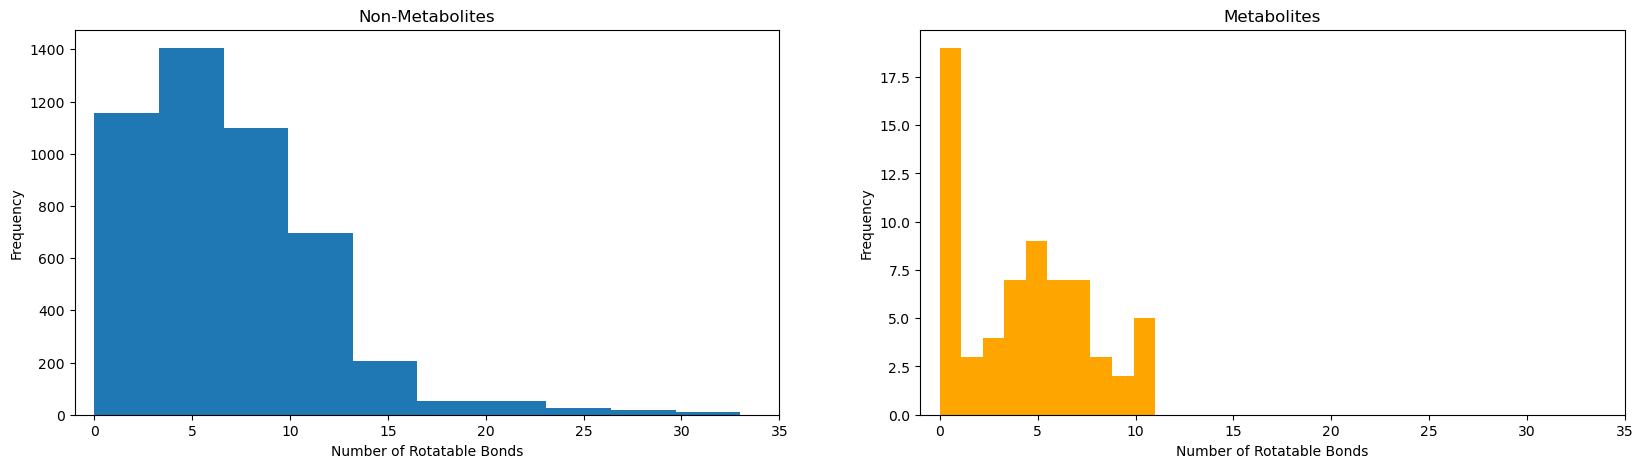

In [40]:
# Number of Rotatable Bonds
fig,ax = plt.subplots(1,2,figsize=(20,5))
dfTrain['NumRotatableBonds'].plot(kind="hist",ax=ax[0], title = "Non-Metabolites", xlabel = "Number of Rotatable Bonds", xlim = (-1, 35))
dfTest['NumRotatableBonds'].plot(kind="hist",ax=ax[1], title = "Metabolites", xlabel = "Number of Rotatable Bonds", color = 'orange', xlim = (-1, 35))
plt.show()

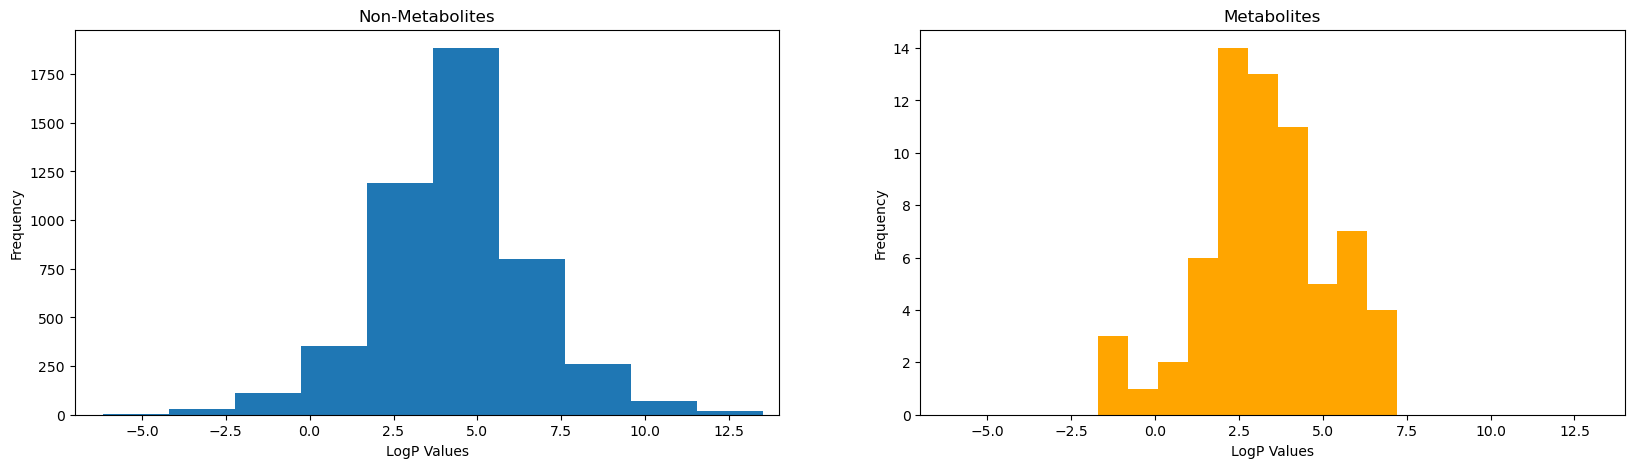

In [34]:
# LogP
fig,ax = plt.subplots(1,2,figsize=(20,5))
dfTrain['MolLogP'].plot(kind="hist",ax=ax[0], title = "Non-Metabolites", xlabel = "LogP Values", xlim = (-7, 14))
dfTest['MolLogP'].plot(kind="hist",ax=ax[1], title = "Metabolites", xlabel = "LogP Values", color = 'orange', xlim = (-7, 14))
plt.show()

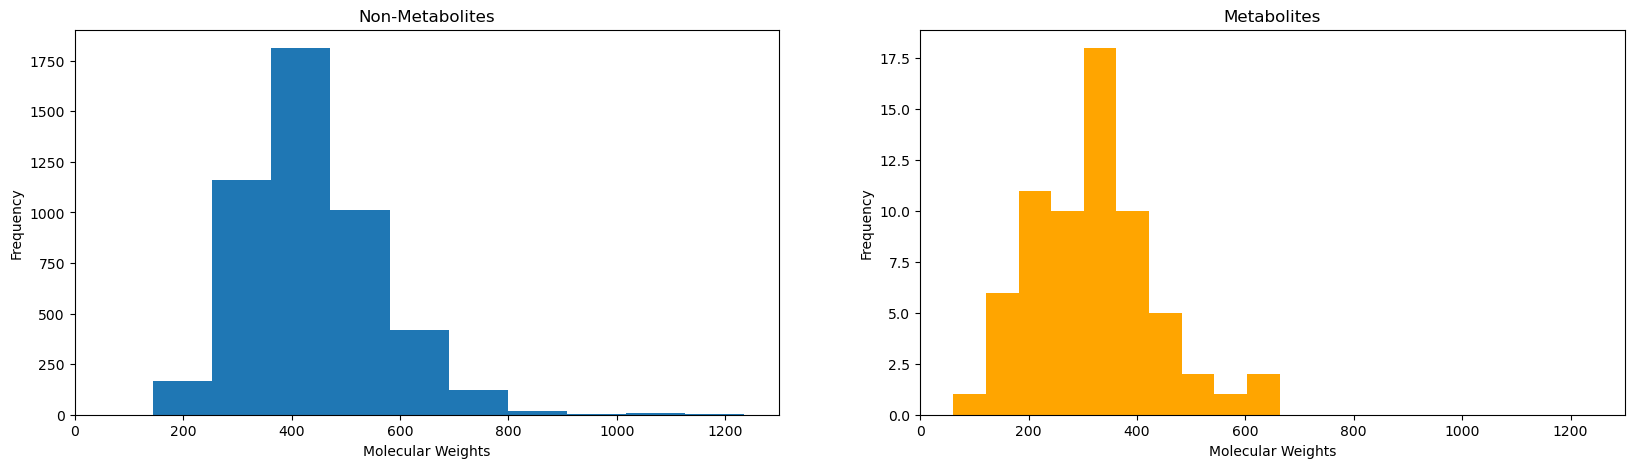

In [35]:
# Molecular Weights
fig,ax = plt.subplots(1,2,figsize=(20,5))
dfTrain['MolWt'].plot(kind="hist",ax=ax[0], title = "Non-Metabolites", xlabel = "Molecular Weights", xlim = (0, 1300))
dfTest['MolWt'].plot(kind="hist",ax=ax[1], title = "Metabolites", xlabel = "Molecular Weights", color = 'orange', xlim = (0, 1300))
plt.show()

# Heatmap Attempt

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

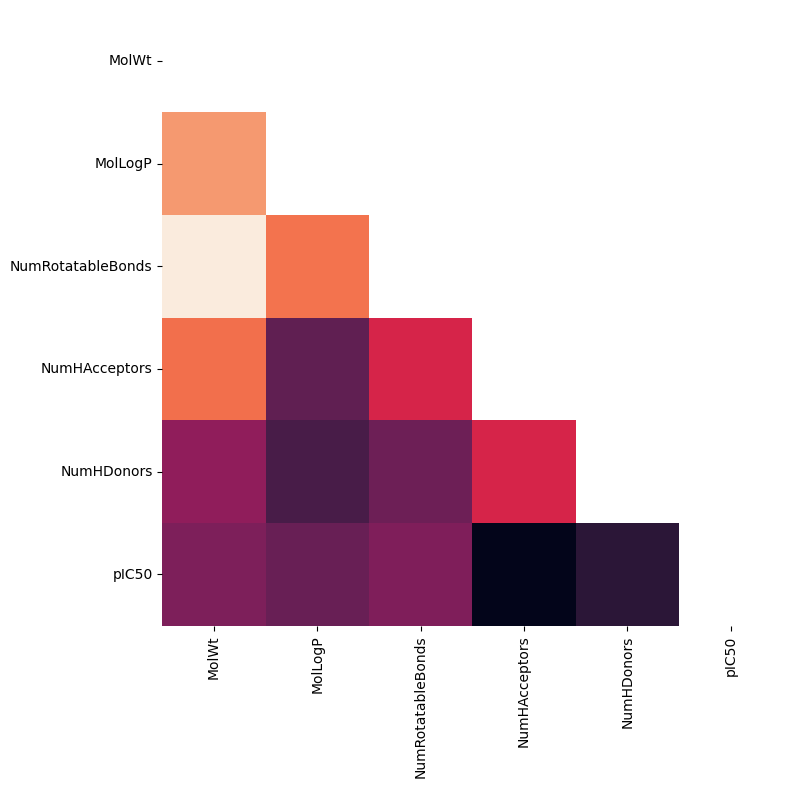

In [8]:
import numpy as np
num_tgt = chosen_descriptors.copy() 
num_tgt.append('pIC50')
fig = plt.figure(figsize=(8,8))
sns.heatmap(dfTrain[num_tgt].corr(method='pearson'),annot=True,fmt='.2f',mask=np.triu(dfTrain[num_tgt].corr(method='pearson')),cbar=False)

In [9]:
dfTrain[num_tgt].corr()
dfTrain[num_tgt].corr()['pIC50']

MolWt                0.257273
MolLogP              0.227922
NumRotatableBonds    0.259844
NumHAcceptors        0.069832
NumHDonors           0.138002
pIC50                1.000000
Name: pIC50, dtype: float64

# Getting RDKit Descriptors and Saving as Files

In [43]:
# Getting all RDKit Descriptors and Saving it as a CSV File
allDescrsTrain = [Descriptors.CalcMolDescriptors(mol) for mol in smiles_listTrain]
allTrainDf = pd.DataFrame(allDescrsTrain)
allTrainDf.head()

allDescrsTest = [Descriptors.CalcMolDescriptors(mol) for mol in smiles_listTest]
allTestDf = pd.DataFrame(allDescrsTest)
allTestDf.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,11.591481,11.591481,0.189306,-0.309798,0.886859,23.608696,333.453,310.269,333.139865,124,...,1,0,0,0,0,0,0,0,0,0
1,6.216160,6.216160,0.353001,0.353001,0.449383,12.642857,399.966,369.726,399.207740,150,...,0,0,0,0,0,0,0,0,0,0
2,12.142874,12.142874,0.133919,-0.887671,0.434190,10.909091,302.238,292.158,302.042653,112,...,0,0,0,0,0,0,0,0,0,0
3,9.410680,9.410680,0.284153,0.284153,0.779698,12.100000,268.356,248.196,268.146330,104,...,0,0,0,0,0,0,0,0,0,0
4,13.646561,13.646561,0.083443,-0.083443,0.318664,14.352941,473.594,446.378,473.166079,174,...,0,0,0,0,0,0,0,1,0,0


In [47]:
allData = pd.concat([allTrainDf, allTestDf], ignore_index=True)
allTargets = pd.concat([dfTrain['pIC50'], dfTest['pIC50']], ignore_index=True)
allData.to_csv("allDescriptors.csv", index=False)
allTargets.to_csv("allTargets.csv", index=False)

In [11]:
allTrainDf.to_csv('allTrainDescriptors.csv', index=False)

In [12]:
dfTrain['pIC50'].to_csv('trainTarget.csv', index = False)